In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
print(cv2.__version__)
import os
print(os.listdir("../input"))

3.4.2
['train', 'test', 'trainLabels.npy', 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', 'testbeg.npy', 'train.csv', 'sample_submission.csv', 'test.csv', 'trainbeg.npy']


In [3]:
X_train = np.load('../input/trainbeg.npy')

print(X_train)

[[[[ 99. 101. 111.]
   [115. 117. 125.]
   [135. 129. 128.]
   ...
   [ 41.  32.  28.]
   [ 41.  32.  27.]
   [ 35.  28.  27.]]

  [[101. 102. 111.]
   [104. 106. 114.]
   [118. 111. 111.]
   ...
   [ 40.  31.  30.]
   [ 39.  31.  29.]
   [ 32.  26.  26.]]

  [[118. 114. 122.]
   [116. 114. 116.]
   [121. 117. 120.]
   ...
   [ 53.  40.  42.]
   [ 60.  52.  52.]
   [ 39.  32.  29.]]

  ...

  [[ 55.  68.  83.]
   [ 59.  71.  85.]
   [ 59.  72.  88.]
   ...
   [ 52.  68.  87.]
   [ 55.  69.  86.]
   [ 53.  67.  83.]]

  [[ 60.  72.  86.]
   [ 61.  73.  85.]
   [ 69.  80.  93.]
   ...
   [ 42.  63.  91.]
   [ 52.  67.  84.]
   [ 50.  64.  79.]]

  [[ 53.  67.  83.]
   [ 57.  69.  84.]
   [ 58.  68.  82.]
   ...
   [ 42.  59.  76.]
   [ 42.  60.  83.]
   [ 45.  62.  83.]]]


 [[[235. 233. 233.]
   [227. 226. 226.]
   [176. 171. 168.]
   ...
   [197. 199. 198.]
   [197. 200. 200.]
   [189. 189. 191.]]

  [[237. 237. 237.]
   [231. 229. 229.]
   [213. 210. 210.]
   ...
   [206. 206. 206.]
 

In [4]:
X_test = np.load('../input/testbeg.npy')

print(X_test)

[[[[100. 155. 164.]
   [ 75. 146. 149.]
   [102. 153. 162.]
   ...
   [120. 172. 179.]
   [104. 164. 173.]
   [102. 163. 169.]]

  [[110. 155. 167.]
   [100. 156. 165.]
   [ 92. 157. 163.]
   ...
   [108. 163. 168.]
   [107. 161. 166.]
   [103. 159. 165.]]

  [[129. 169. 177.]
   [121. 162. 167.]
   [118. 165. 169.]
   ...
   [105. 164. 167.]
   [102. 165. 166.]
   [107. 163. 166.]]

  ...

  [[145. 138. 139.]
   [146. 139. 139.]
   [144. 136. 136.]
   ...
   [142. 145. 150.]
   [140. 142. 147.]
   [130. 130. 134.]]

  [[148. 141. 142.]
   [147. 139. 140.]
   [148. 140. 142.]
   ...
   [135. 136. 141.]
   [ 95.  96. 101.]
   [133. 135. 140.]]

  [[153. 147. 152.]
   [151. 150. 155.]
   [155. 153. 159.]
   ...
   [142. 144. 154.]
   [138. 142. 151.]
   [133. 137. 145.]]]


 [[[198. 176. 156.]
   [206. 183. 160.]
   [208. 186. 161.]
   ...
   [193. 176. 154.]
   [198. 179. 160.]
   [186. 168. 145.]]

  [[203. 181. 156.]
   [201. 176. 154.]
   [206. 180. 154.]
   ...
   [195. 178. 157.]
 

In [5]:
data_classes = ["antelope","bat","beaver","bobcat","buffalo","chihuahua","chimpanzee","collie","dalmatian","german+shepherd","grizzly+bear","hippopotamus","horse","killer+whale","mole","moose","mouse","otter","ox","persian+cat","raccoon","rat","rhinoceros","seal","siamese+cat","spider+monkey","squirrel","walrus","weasel","wolf"]

import pandas as pd
# tr_label = pd.read_csv('../input/train.csv')
# tr_label.head(10)

In [6]:
Y_train =  np.load('../input/trainLabels.npy')

print(Y_train.shape)

Y_train = Y_train.reshape(Y_train.shape[0])


np.squeeze(Y_train)
print(Y_train.shape)
print(Y_train)

(13000, 1)
(13000,)
[11 26 10 ... 26 26 26]


In [7]:
from sklearn.model_selection import cross_val_score
from keras.models import Sequential, load_model, Model
from keras.layers import Input, BatchNormalization
from keras.layers import Dense, LSTM, GlobalAveragePooling1D, GlobalAveragePooling2D,Dropout
from keras.layers import Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D

def conv_classifier(a):    
    model_input = Input(shape=(a, a,3))
    
    # Define a model architecture
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(model_input)
    x = MaxPooling2D(pool_size=(2, 2))(x)    
    x = Dropout(0.25)(x)
    
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)    
    x = Dropout(0.25)(x)
    
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)       
    x = MaxPooling2D(pool_size=(2, 2))(x)    
    x = Dropout(0.25)(x)
    
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)    
    x = Dropout(0.25)(x)
    
    y1 = Dense(30, activation='softmax')(x)
    
    model = Model(inputs=model_input, outputs= y1)
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Using TensorFlow backend.


In [8]:
import keras
model = conv_classifier(X_train.shape[1])

model.summary()
print(X_train.shape)


history = model.fit(x = X_train/255.,y = keras.utils.to_categorical(Y_train, num_classes=30),batch_size=128,epochs=30,validation_split=0.15, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 128)       0         
__________

13000/13000 [==============================] - 82s 6ms/step
[0.5818108570231841, 0.8993846153846153]


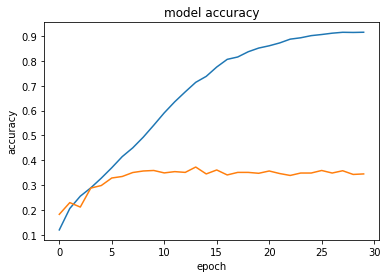

In [10]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

print(model.evaluate(x=X_train/255., y=keras.utils.to_categorical(Y_train, num_classes=30), verbose=1))

In [11]:
tr_label = pd.read_csv('../input/sample_submission.csv')
tr_label.head(10)

,image_id,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,german+shepherd,grizzly+bear,hippopotamus,horse,killer+whale,mole,moose,mouse,otter,ox,persian+cat,raccoon,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf
0,Img-1.jpg,0.461052,0.160543,0.596985,0.112976,0.514793,0.795334,0.329462,0.956140,0.150305,0.038755,0.635833,0.062951,0.835642,0.719551,0.938575,0.379788,0.683113,0.474256,0.314807,0.999069,0.097436,0.960740,0.586314,0.358086,0.632356,0.129911,0.970917,0.075613,0.891457,0.353058
1,Img-2.jpg,0.391038,0.015032,0.808050,0.229542,0.632174,0.557231,0.993525,0.392024,0.344499,0.910090,0.230949,0.148388,0.997693,0.489365,0.488239,0.254161,0.978706,0.738713,0.760322,0.316161,0.980599,0.252298,0.882384,0.666060,0.404774,0.244035,0.319077,0.399242,0.282049,0.510206
2,Img-3.jpg,0.686004,0.862929,0.661918,0.725864,0.610226,0.463240,0.482999,0.377200,0.708358,0.735971,0.030166,0.092827,0.623747,0.053444,0.928275,0.646671,0.864341,0.220398,0.718669,0.135299,0.763146,0.101021,0.725597,0.252975,0.804369,0.599251,0.300347,0.513784,0.337301,0.045477
3,Img-4.jpg,0.702411,0.557327,0.143711,0.693352,0.008305,0.807822,0.920738,0.446771,0.891311,0.149487,0.792391,0.392366,0.726710,0.106391,0.555933,0.017058,0.654816,0.810512,0.792876,0.284868,0.406623,0.605928,0.085137,0.706568,0.325001,0.591561,0.246156,0.879007,0.130129,0.113896
4,Img-5.jpg,0.097772,0.376566,0.127358,0.713473,0.516010,0.548523,0.755888,0.428397,0.378050,0.340612,0.964877,0.248562,0.817290,0.674802,0.943674,0.159576,0.644639,0.959377,0.325795,0.318026,0.152309,0.445195,0.466826,0.081746,0.180878,0.526940,0.838946,0.045366,0.001368,0.653959
5,Img-6.jpg,0.009321,0.249814,0.426447,0.086664,0.979221,0.921784,0.735976,0.384729,0.397680,0.793831,0.997763,0.332127,0.176973,0.679244,0.901504,0.366275,0.742567,0.243613,0.437453,0.237384,0.459805,0.201891,0.594657,0.788210,0.150906,0.482589,0.963277,0.197613,0.770331,0.480804
6,Img-7.jpg,0.684350,0.162477,0.101691,0.949447,0.498905,0.850934,0.701685,0.777306,0.920917,0.471050,0.866151,0.625059,0.281246,0.426604,0.135671,0.961318,0.578680,0.859488,0.026572,0.940855,0.117539,0.789910,0.201921,0.964982,0.642279,0.398275,0.415753,0.805578,0.508767,0.999122
7,Img-8.jpg,0.135018,0.326134,0.618519,0.142591,0.153386,0.972797,0.310150,0.953018,0.751198,0.083431,0.569787,0.134883,0.729702,0.244584,0.374279,0.690376,0.503406,0.765948,0.546314,0.148883,0.004082,0.665143,0.985025,0.448522,0.638166,0.790758,0.793219,0.801805,0.500722,0.183708
8,Img-9.jpg,0.812922,0.301592,0.470940,0.464891,0.623458,0.305349,0.077108,0.964322,0.364157,0.493489,0.953002,0.599649,0.057190,0.944310,0.454790,0.166181,0.390907,0.668022,0.459493,0.218288,0.759042,0.358871,0.415832,0.582689,0.667768,0.985599,0.738234,0.151791,0.190595,0.352430
9,Img-10.jpg,0.792503,0.217339,0.508362,0.658294,0.082943,0.683944,0.708626,0.867725,0.012359,0.049940,0.784013,0.346685,0.893887,0.513306,0.166703,0.045084,0.873222,0.404178,0.070991,0.326925,0.773313,0.302918,0.496886,0.493070,0.682184,0.630282,0.876185,0.367892,0.681865,0.425979


In [12]:
y_test_predict = model.predict(x=X_test/255.)

print('\n',y_test_predict)


 [[3.6299592e-04 1.1890600e-03 8.6339625e-08 ... 1.1745251e-06
  9.8195486e-08 5.8680912e-06]
 [1.5132102e-04 6.4794170e-03 6.8343701e-03 ... 9.0253450e-02
  1.0581414e-02 7.5492390e-02]
 [9.8381609e-01 2.5640813e-07 7.5724020e-06 ... 3.1306300e-08
  1.0707098e-03 2.3568387e-05]
 ...
 [8.3840469e-06 8.7852916e-04 2.4851643e-06 ... 1.2317652e-09
  1.9065712e-07 4.8588039e-03]
 [2.8073901e-11 6.5647685e-16 9.9971032e-08 ... 1.1281350e-18
  4.4285567e-18 4.3663795e-15]
 [2.3901848e-07 8.6206082e-06 2.2237664e-05 ... 5.8593918e-07
  1.5097965e-03 4.4251770e-08]]


In [13]:
print(y_test_predict[1])

print(X_test/255.)

[1.5132102e-04 6.4794170e-03 6.8343701e-03 2.0653060e-05 3.4596773e-03
 2.0444914e-04 7.6093957e-02 1.5236349e-04 5.8006804e-05 2.0174574e-02
 1.4064803e-04 2.7329466e-01 2.2054410e-05 8.4317863e-02 6.1734527e-04
 5.9775237e-02 1.7847734e-03 4.3339882e-02 1.8917897e-03 1.3852131e-02
 4.2027463e-03 1.2505717e-02 3.2965327e-04 1.7932437e-01 5.0096086e-04
 3.2007784e-04 3.3824023e-02 9.0253450e-02 1.0581414e-02 7.5492390e-02]
[[[[0.39215686 0.60784314 0.64313725]
   [0.29411765 0.57254902 0.58431373]
   [0.4        0.6        0.63529412]
   ...
   [0.47058824 0.6745098  0.70196078]
   [0.40784314 0.64313725 0.67843137]
   [0.4        0.63921569 0.6627451 ]]

  [[0.43137255 0.60784314 0.65490196]
   [0.39215686 0.61176471 0.64705882]
   [0.36078431 0.61568627 0.63921569]
   ...
   [0.42352941 0.63921569 0.65882353]
   [0.41960784 0.63137255 0.65098039]
   [0.40392157 0.62352941 0.64705882]]

  [[0.50588235 0.6627451  0.69411765]
   [0.4745098  0.63529412 0.65490196]
   [0.4627451  0.647058

In [14]:
label_df = pd.DataFrame(data=y_test_predict, columns= data_classes)
label_df.head(10)

,antelope,bat,beaver,bobcat,buffalo,chihuahua,chimpanzee,collie,dalmatian,german+shepherd,grizzly+bear,hippopotamus,horse,killer+whale,mole,moose,mouse,otter,ox,persian+cat,raccoon,rat,rhinoceros,seal,siamese+cat,spider+monkey,squirrel,walrus,weasel,wolf
0,3.629959e-04,1.189060e-03,8.633963e-08,6.778704e-10,9.548468e-01,1.334162e-06,9.480098e-07,1.473117e-04,1.148797e-07,8.960827e-06,3.932209e-03,2.839875e-02,5.683597e-04,1.099819e-07,5.006499e-06,1.925768e-03,4.894413e-05,3.163756e-06,3.139772e-05,9.981245e-08,1.602784e-07,1.236289e-06,8.131564e-03,3.873282e-04,9.130094e-07,1.480035e-08,2.022794e-07,1.174525e-06,9.819549e-08,5.868091e-06
1,1.513210e-04,6.479417e-03,6.834370e-03,2.065306e-05,3.459677e-03,2.044491e-04,7.609396e-02,1.523635e-04,5.800680e-05,2.017457e-02,1.406480e-04,2.732947e-01,2.205441e-05,8.431786e-02,6.173453e-04,5.977524e-02,1.784773e-03,4.333988e-02,1.891790e-03,1.385213e-02,4.202746e-03,1.250572e-02,3.296533e-04,1.793244e-01,5.009609e-04,3.200778e-04,3.382402e-02,9.025345e-02,1.058141e-02,7.549239e-02
2,9.838161e-01,2.564081e-07,7.572402e-06,9.696280e-07,4.485285e-03,3.256856e-06,1.058221e-05,4.025755e-06,3.075126e-07,6.385569e-05,2.292288e-05,1.908151e-03,2.649562e-05,2.120239e-08,2.220878e-05,3.085481e-03,5.206714e-06,3.344049e-05,2.969189e-07,8.445559e-07,1.891997e-07,1.994329e-06,3.868217e-03,1.519997e-03,1.355878e-05,2.693401e-06,1.671891e-06,3.130630e-08,1.070710e-03,2.356839e-05
3,2.953107e-06,5.295989e-07,5.395939e-04,5.931280e-06,3.795838e-06,2.625336e-04,2.760215e-04,4.008560e-02,3.851909e-06,1.026939e-01,5.495227e-07,1.298260e-07,4.858242e-03,5.244464e-12,1.098971e-07,5.973967e-05,3.043361e-08,6.335277e-05,8.413476e-01,1.507720e-04,2.713737e-05,6.799416e-06,4.482593e-07,8.399954e-06,8.510381e-08,2.867184e-06,1.884568e-06,1.022298e-08,5.568684e-04,9.040255e-03
4,1.423004e-04,8.848233e-05,4.470510e-03,8.524411e-07,4.346228e-06,1.353339e-02,1.951759e-05,1.905945e-03,6.998035e-10,9.436797e-01,8.836116e-05,3.908013e-06,1.077475e-03,1.944649e-10,1.741986e-05,7.694322e-05,1.237093e-04,3.471046e-04,4.202327e-07,4.753129e-06,1.833816e-06,2.737412e-02,1.750686e-09,2.988568e-03,2.149042e-03,4.270058e-04,4.463251e-05,3.083991e-05,4.411898e-06,1.394273e-03
5,1.922001e-12,8.913056e-10,7.926488e-09,5.357842e-08,4.469301e-07,1.240226e-11,1.675157e-05,1.488355e-07,5.940836e-08,1.331487e-06,7.868457e-11,4.069893e-03,2.935404e-10,2.414632e-04,2.838319e-08,9.728310e-09,5.929465e-10,6.697753e-05,4.108583e-10,3.127517e-11,9.174338e-09,1.911279e-08,8.914128e-06,9.954986e-01,9.051945e-11,1.908958e-09,6.046785e-07,9.464552e-05,3.958054e-08,5.991800e-10
6,2.016826e-04,1.012849e-06,8.376526e-02,3.253643e-06,3.948024e-02,8.935364e-08,7.987120e-01,1.341682e-07,1.970822e-08,1.242692e-03,3.308115e-05,2.639591e-03,6.855641e-06,2.935057e-10,1.059516e-02,2.467453e-02,2.532616e-06,8.752550e-08,4.897665e-10,1.694567e-07,6.443954e-06,7.630617e-06,3.441703e-03,5.454622e-09,1.352831e-08,7.053866e-05,1.532069e-02,2.162154e-10,1.979455e-02,5.037924e-08
7,4.304461e-06,8.997566e-05,1.996003e-06,1.166953e-07,7.187513e-06,1.120795e-03,3.855040e-04,1.877398e-02,4.267866e-07,3.759767e-04,1.016291e-02,5.077612e-05,9.447327e-01,1.314175e-08,3.593952e-05,6.724293e-05,2.416661e-06,8.023770e-05,6.120726e-04,3.185489e-03,8.974710e-05,2.687627e-04,4.516150e-04,2.114865e-06,1.590044e-03,4.829062e-04,1.515448e-04,3.613373e-05,6.168369e-07,1.723647e-02
8,2.007706e-05,2.085677e-06,7.199421e-06,6.839736e-06,3.198544e-02,3.235375e-05,7.703970e-07,9.210087e-06,1.353136e-10,1.039545e-05,5.510436e-04,3.509064e-05,5.635179e-03,9.739960e-10,1.294970e-09,6.663614e-03,7.897472e-07,9.452812e-07,8.185215e-01,1.201974e-01,9.413283e-07,1.152185e-06,4.814896e-03,3.873036e-08,1.756270e-05,2.958183e-06,1.146151e-02,6.043468e-07,1.432006e-07,2.030338e-05
9,6.317199e-09,1.500805e-15,3.584959e-10,8.036669e-11,1.318601e-18,4.149856e-09,9.812801e-14,1.075542e-03,9.989244e-01,2.999891e-10,1.267521e-14,1.376739e-14,2.111035e-08,5.686999e-13,3.258568e-18,6.063642e-15,6.12139

In [15]:
subm = pd.DataFrame()


te_label = pd.read_csv('../input/test.csv')


print(te_label['Image_id'])

subm['image_id'] = te_label['Image_id']

0          Img-1.jpg
1          Img-2.jpg
2          Img-3.jpg
3          Img-4.jpg
4          Img-5.jpg
5          Img-6.jpg
6          Img-7.jpg
7          Img-8.jpg
8          Img-9.jpg
9         Img-10.jpg
10        Img-11.jpg
11        Img-12.jpg
12        Img-13.jpg
13        Img-14.jpg
14        Img-15.jpg
15        Img-16.jpg
16        Img-17.jpg
17        Img-18.jpg
18        Img-19.jpg
19        Img-20.jpg
20        Img-21.jpg
21        Img-22.jpg
22        Img-23.jpg
23        Img-24.jpg
24        Img-25.jpg
25        Img-26.jpg
26        Img-27.jpg
27        Img-28.jpg
28        Img-29.jpg
29        Img-30.jpg
            ...     
5970    Img-5971.jpg
5971    Img-5972.jpg
5972    Img-5973.jpg
5973    Img-5974.jpg
5974    Img-5975.jpg
5975    Img-5976.jpg
5976    Img-5977.jpg
5977    Img-5978.jpg
5978    Img-5979.jpg
5979    Img-5980.jpg
5980    Img-5981.jpg
5981    Img-5982.jpg
5982    Img-5983.jpg
5983    Img-5984.jpg
5984    Img-5985.jpg
5985    Img-5986.jpg
5986    Img-5

In [16]:
print(subm.head(10))

     image_id
0   Img-1.jpg
1   Img-2.jpg
2   Img-3.jpg
3   Img-4.jpg
4   Img-5.jpg
5   Img-6.jpg
6   Img-7.jpg
7   Img-8.jpg
8   Img-9.jpg
9  Img-10.jpg


In [17]:
subm = pd.concat([subm, label_df], axis=1)

In [18]:
subm.to_csv('submitDL.csv',index = False)

In [ ]:
subm